2. Activity 2: Illustrate the fit of a different type of model: smoothed Legendre
polynomials, and compare the results with regular linear regression. Keep in mind that
the smoothed Legendre polynomials are somewhat sophisticated in setup. How do the
two methods compare? Note in standard learning, the practitioners often say “prevent
overfitting by using a model with larger bias” (e.g., smaller order, shorter tree, etc.)

3. Activity 3 (Optional): Illustrates ensembles. How could you use these ensembles to
support one’s understanding of the learning achieved?


4. Activity 4 (Extra): This is as an alternate laboratory activity (simpler to follow) to
illustrate the bias and variance tradeoffs. It also introduces the seaborn library’s
regression plot.

## Activity 1: Basics of Linear Algorithms

1. Activity 1: Examine the bias of the linear regression models. Small orders are said to
have large bias, and large orders small bias. What can you say about the tradeoff
between using a small or large biased model? (Bias is explained in Week 6 lecture
videos). This laboratory activity content is for Activity 1, for the other activities, you can
refer to the content inside the respective .ipynb files.

In [2]:
import numpy
import matplotlib.pyplot as pl
import regressiondemo as rd
%matplotlib inline

In [3]:
# The "true" function of x with range fixed at [0,10]
def truefunc(x):
 return numpy.sin(x*2.0)*numpy.sqrt(x)/3.3

Text(0.5, 0, 'x')

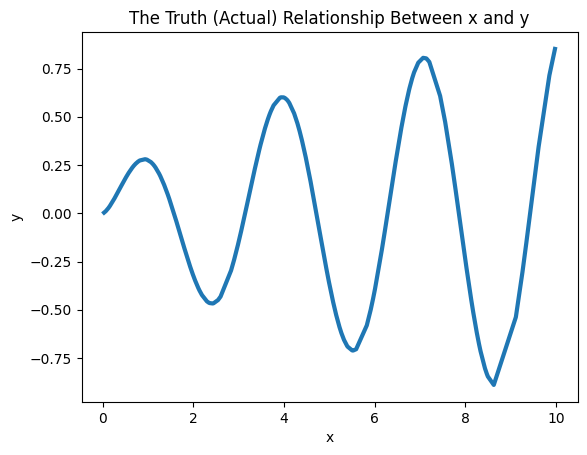

In [4]:
# Create 200 x-values using the regressiondemo.py function called makeX()
xts = rd.makeX(200)
# Use the truefunc() to create the matching y-values that fit
# that true equation
yts = truefunc(xts)
pl.plot(xts, yts, label = 'truth', linewidth=3.0)
pl.title("The Truth (Actual) Relationship Between x and y")
pl.ylabel('y')
pl.xlabel('x')

In [5]:
# Don't make more than 100 points for this demo
points = 30
# The regressiondemo.py provides settings for noise level
# creation using standard deviation as the input
rd.setSigma(0.2)
# Let's create some (x,y) points, x being the independent
# variable. The difference from the earlier makeX is that
# we now use the 'points' variable.
x = rd.makeX(points)
# y-values are based on the truefunc(x) but we want to add
# some noise to it.
y = rd.addNoise(truefunc(x))

Practise 1:
Scatter plot the simulated data collection. As an additional mini challenge, plot the points using
the symbol 'x' instead of dots. Your plot should look like below

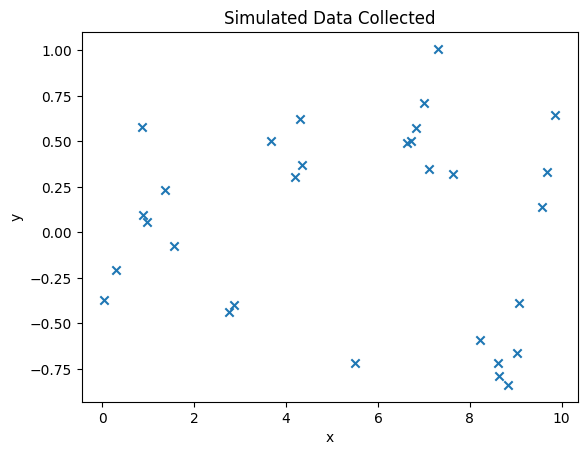

In [11]:
pl.scatter(x, y, marker='x')
pl.title("Simulated Data Collected")
pl.xlabel('x')
pl.ylabel('y')
pl.show()

### Step 1.1: Fitting different orders of polynomials

Text(0.5, 0, 'x')

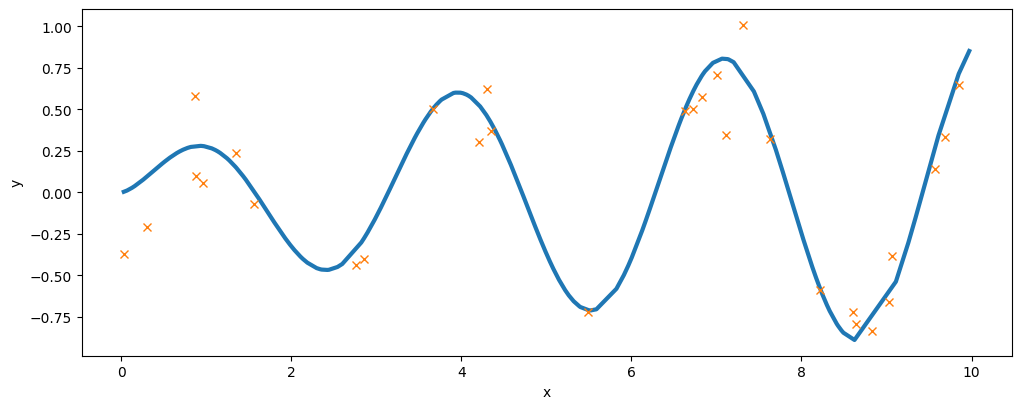

In [12]:
# Make a larger canvas size (figures in inches)
pl.figure(figsize=[12,4.5])
# Plot the true relationship between x and y
pl.plot(xts, yts, label = 'truth', linewidth=3.0)
# Plot the simulated collected data
pl.plot(x, y, 'x')
pl.ylabel('y')
pl.xlabel('x')

In [13]:
# Build a set of polynomial orders to use to fit
# Note that the regressiondemo.py has a function makeOrders()
# that takes in the number of points we have and create
# a set of orders (polynomial orders in this case)
orders = rd.makeOrders(points)
print('Fitting polynomials of orders = ', orders)

Fitting polynomials of orders =  [3, 6, 12, 25]


Practise 2:
What’s the output of the print statement?

The powers of the polynomials. Power of x in the funtion

Look at the graph below.

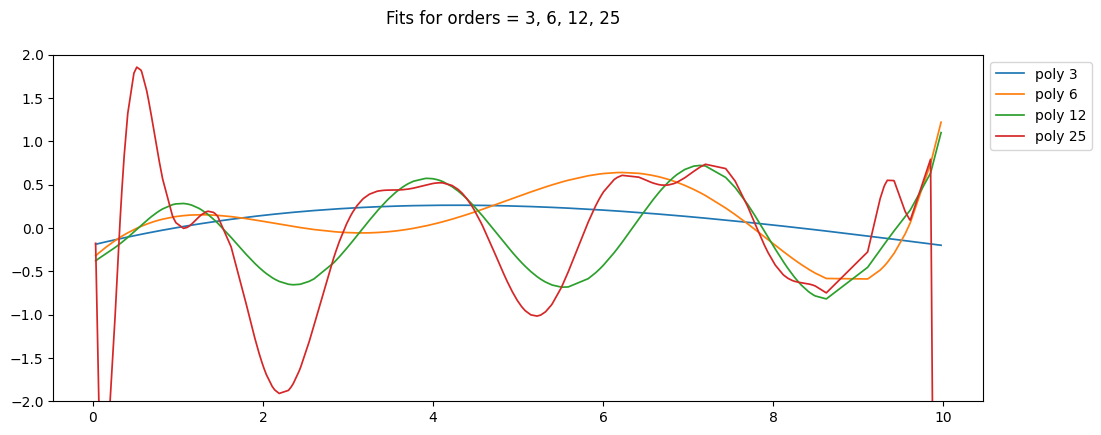

In [14]:
# Make a larger canvas size (figures in inches)
pl.figure(figsize=[12,4.5])
# If fitting goes a bit wild, need to constrain what y's are plotted
# Uncomment the following line and re-run this cell
pl.ylim(-2, 2)
# We now create a linear regression for each of the order
for order in orders:
 # Using the linear regression function in regressiondemo.py.
 # Again, note that this is for illustration purposes, for any
 # exercises, assignments, assessment, this is not to be used.
 ys = rd.linReg(x, y, xts, order)
 # Plot fitted curve
 pl.plot(xts, ys, label = 'poly ' + str(order), linewidth = 1.25)

 # We want to have the legend for the lines
 pl.legend(bbox_to_anchor=(1, 1))
 pl.suptitle('Fits for orders = '+ ', '.join(map(str, orders)) )

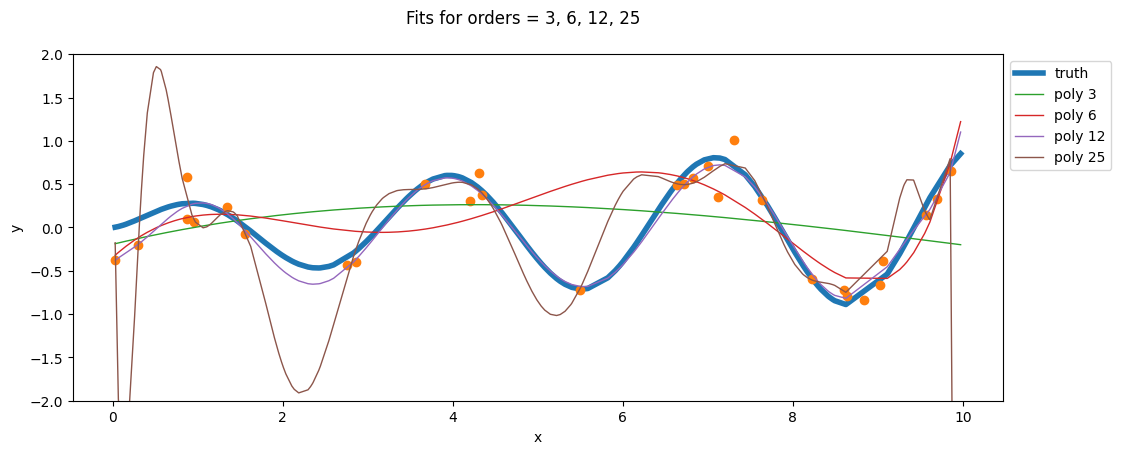

In [15]:
# Make a larger canvas size
pl.figure(figsize=[12,4.5])
# Plot the true relationship between x and y
pl.plot(xts, yts, label = 'truth', linewidth=4) # default is green line?
# Plot the simulated collected data
pl.plot(x, y, 'o')
pl.ylabel('y')
pl.xlabel('x')
# Build a set of polynomial orders to use to fit
orders = rd.makeOrders(points)
pl.ylim(-2, 2)
for order in orders:
 # Using the linear regression function in regressiondemo.py.
 ys = rd.linReg(x, y, xts, order)
 # Plot fitted curve
 pl.plot(xts, ys, label = 'poly ' + str(order), linewidth = 1)

 # We want to have the legend for the lines
 pl.legend(bbox_to_anchor=(1, 1))
 pl.suptitle('Fits for orders = '+ ', '.join(map(str, orders)) )

Practise 3:
● What do you see from the plots with the different polynomial dimensions (orders)?



● How well do higher dimensional polynomials work?


● Which order seems to give the best fit?
poly12 gives the best fit. Has low bias and low variance.



bias how far it is relative to the truth

polynomial 3 has high bias because it is far from the true

poly 12 low bias

poly 25 low bias slightly higher variance

erratic spread of results high variance



### Step 1.2: How well can linear regression fit the "truth" anyway?

Fitting polynomials of orders =  [3, 6, 12, 25]


Text(0.5, 0.98, 'Best possible fits')

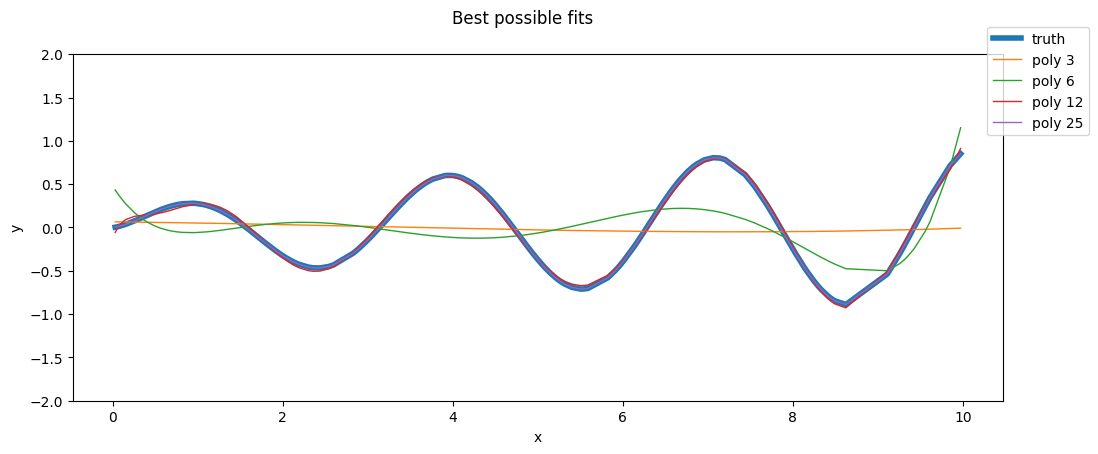

In [16]:
# Plot the truth
pl.figure(figsize=[12,4.5])
pl.plot(xts, yts, label = 'truth', linewidth = 4)
pl.ylabel('y')
pl.xlabel('x')
print ("Fitting polynomials of orders = ", orders)

for order in orders:
 ys = rd.bestLinReg(truefunc,xts,order)
 pl.plot(xts, ys, label = 'poly ' + str(order), linewidth = 1)

pl.ylim(-2,2)
pl.legend(bbox_to_anchor=(1.1, 1.1))
pl.suptitle('Best possible fits')


## Model bias

Practise 4: Question
● Do we always go with the most complex models? In this case the highest possible
polynomial?

No, find the best fit. High order learns more and decrease bias but will increase variance

### Step 1.3: The effect of different samples

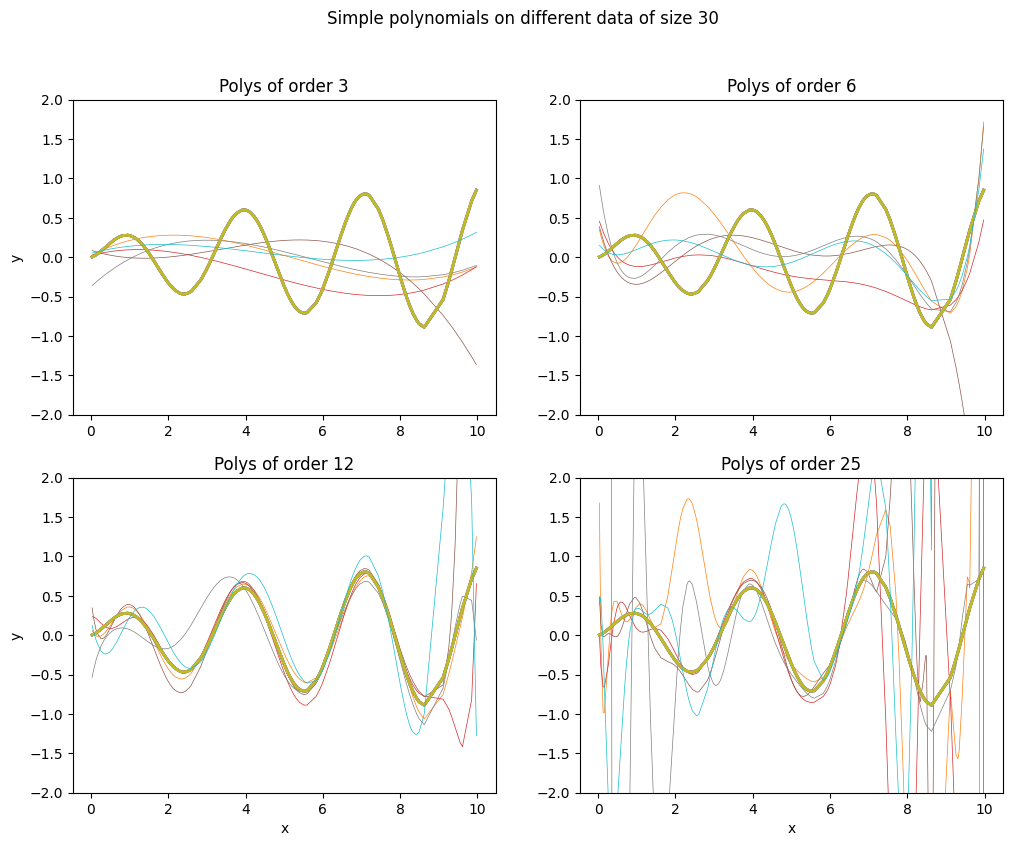

In [19]:
points = 30
orders = rd.makeOrders(points)
# This activity is also to show how you can plot a few graphs
# in one plot. Here we do a 2x2 plot, so need four orders to fit
fourorders = orders[-4:]
setcount = 6
pl.figure(figsize=[12,9])
pl.suptitle('Simple polynomials on different data of size '+ str(points))
# Goes through an iteration to plot multiple graphs into one
for i in range(0, setcount-1):
 # Generate a sample for each graph
 xb = rd.makeX(points)
 yb = rd.addNoise(truefunc(xb))
 # To obtain the position in the subplot
 sp = 1;
 for order in fourorders:
    pl.subplot(2,2,sp)
    sp += 1
    # plot the truth
    pl.plot(xts, yts, linewidth = 2) # default is green line?
     # Just for the axes to be labelled
    if sp>3:
        pl.xlabel('x')
    if sp%2==0:
        pl.ylabel('y')
     
    ys = rd.linReg(xb,yb,xts,order)
    pl.title('Polys of order ' + str(order))
     # Plot fitted curve
    pl.plot(xts, ys, linewidth = 0.5 )
     # The y range for the plot has to be altered depending on the data
    pl.ylim(-2,2) 

Practise 5:
● What would better variance mean technically?
● Which polynomial dimension gives you the best variance from the above plots?

Means it consistent, 

Poly 3 or Poly 12 has the best variance